In [1]:
import pandas as pd
import numpy as np
import datetime
import pytz  #function of time region
import statsmodels.api as sm  # Unit root test
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdate

from statsmodels.tsa.arima.model import ARIMA  #ARIMA  model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

False


<AxesSubplot:xlabel='Date'>

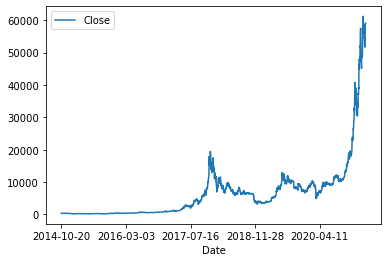

In [3]:
bitcoin = pd.read_csv(r"E:\PhD study\ELEG5491 Introduction to Deep Learning\bitcoin\datasets\bitcoin1dim.csv")
bitcoin1 = bitcoin.groupby([pd.Grouper(key='Date')]).first().reset_index()
df_check=bitcoin.isnull().values.any()
print(df_check)
bitcoin1 = bitcoin1.set_index('Date')
bitcoin1.plot()

Text(0.5, 1.0, 'first order difference')

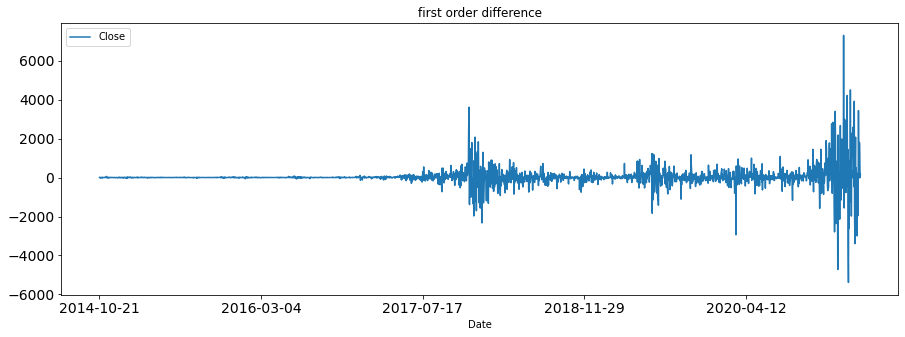

In [4]:
#Differencing to make the time series data stationary.
bitcoin_diff1 = bitcoin1.diff(1)
bitcoin_diff1 = bitcoin_diff1.dropna()
bitcoin_diff1.plot(style='', figsize=(15,5), label='first order difference')
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.title('first order difference')

In [5]:
#ADF Test. The second parameter of the output is P-value. Smaller than 0.05 indicates that the time series data after differencing is stationary now.
print(sm.tsa.stattools.adfuller(bitcoin_diff1))

(-7.304693581822069, 1.310814910394359e-10, 27, 2327, {'1%': -3.4331632910395253, '5%': -2.8627828564265023, '10%': -2.567431627474709}, 35366.333596242526)


<ipython-input-6-6d8861c7e40c>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


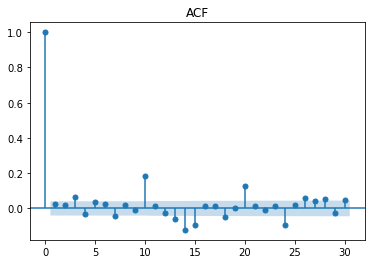

In [6]:
#Draw the pictures of ACF and PACF
acf = plot_acf(bitcoin_diff1, lags=30)
plt.title('ACF')
acf.show()
#We can see that p should be 3, as the third order is over the bound

<ipython-input-7-7fb3b4b7ef9a>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


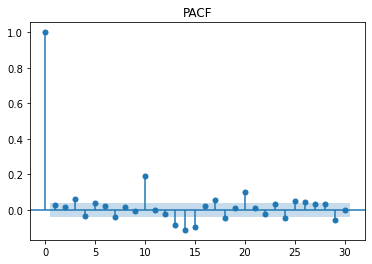

In [7]:
pacf = plot_pacf(bitcoin_diff1, lags=30)
plt.title('PACF')
pacf.show()
plt.show()
#We can see that q should be 3, as the third order is over the bound

In [8]:
#Split dataset
splitdate = '2019-12-17'
bitcoin_train1 = bitcoin.loc[bitcoin.Date <= splitdate]
bitcoin_test1 = bitcoin.loc[bitcoin.Date > splitdate]

In [9]:
bitcoin_train2 = bitcoin_train1.drop(['Date'],axis=1)
bitcoin_test2 = bitcoin_test1.drop(['Date'],axis=1)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1885
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -13289.372
Date:                Mon, 17 May 2021   AIC                          26592.743
Time:                        18:40:29   BIC                          26631.531
Sample:                             0   HQIC                         26607.028
                               - 1885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3710      0.051    -26.812      0.000      -1.471      -1.271
ar.L2         -1.4622      0.035    -41.911      0.000      -1.531      -1.394
ar.L3         -0.7000      0.051    -13.818      0.0

C:\Users\Jingwei Dai\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

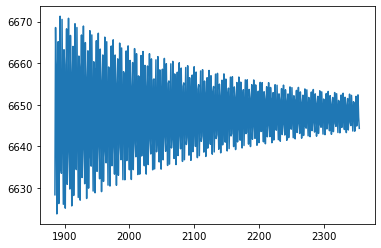

In [10]:
#Run the ARIMA model. Predict future value.
model1 = ARIMA(bitcoin_train2, order=(3,1,3))
results = model1.fit()
print(results.summary())
pred2 = results.predict(1885,2355, dynamic=True, typ='levels')
print(pred2.head())
pred2.plot()

In [11]:
rmse = sqrt(mean_squared_error(pred2, bitcoin_test2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18403.379
